#Image Classification with DAISY Feature and Neural Networks




In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import daisy
from sklearn.neural_network import MLPClassifier

from PIL import Image
from skimage import exposure


## 1. Dataset Preparation

mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extract data

In [3]:
!unzip /content/drive/MyDrive/Al.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-tan.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-tan.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-exp.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-exp.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/astype_copy.pkl  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._astype_copy.pkl  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/npymath.ini  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/._npymath.ini  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/mlib.ini 

## Load Image Data

In [4]:
image_dir = '/content/Al/face-detection/'

# Get all .jpg & .png images in the male folder
male_filenames = [os.path.join(image_dir, 'images/gender/male', filename) for filename in os.listdir(image_dir + 'images/gender/male') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get all .jpg & .png images in the female folder
female_filenames = [os.path.join(image_dir, 'images/gender/female', filename) for filename in os.listdir(image_dir + 'images/gender/female') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get the images using the file names
male_images = [Image.open(filename) for filename in male_filenames]
female_images = [Image.open(filename) for filename in female_filenames]

In [5]:
# make labels
female_labels = [0 for i in range(len(female_images))]
male_labels = [1 for i in range(len(male_images))]

**show** image

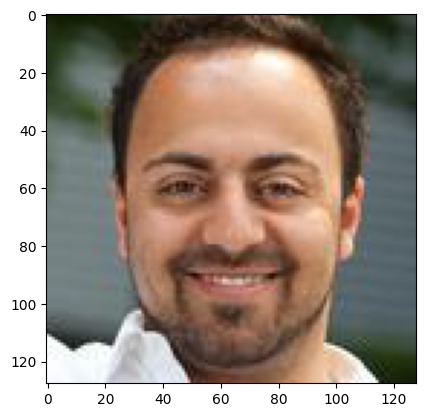

In [6]:
plt.imshow(male_images[1], cmap='gray')

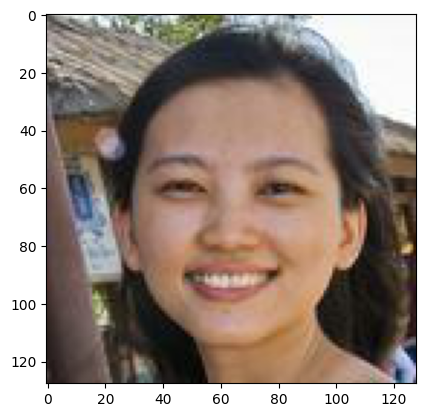

In [7]:
plt.imshow(female_images[1], cmap='gray')

## Test extract DAISY feature from image

In [8]:
# Extract the DAISY descriptor
feature, daisy_image = daisy(male_images[0].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)

In [9]:
feature = feature[0][0]
feature.shape

(104,)

<BarContainer object of 104 artists>

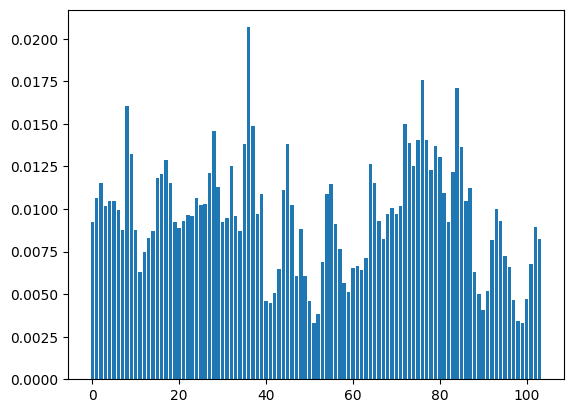

In [10]:
plt.bar(list(range(feature.shape[0])), feature)

In [11]:
feature, daisy_img = daisy(female_images[0].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)

In [12]:
feature = np.array(feature).flatten()
feature.shape

(104,)

<BarContainer object of 104 artists>

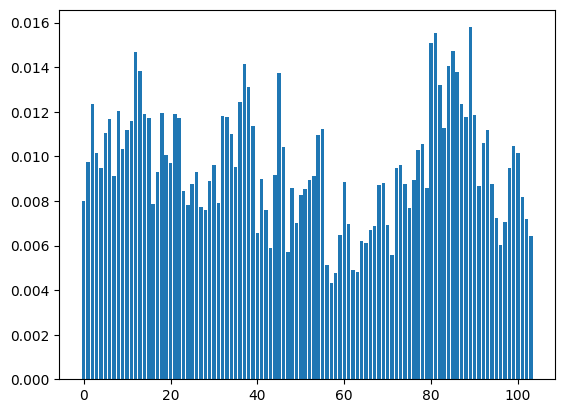

In [13]:
plt.bar(list(range(feature.shape[0])), feature)


## 2. Preprocessing using DAISY Feature Extraction

In [14]:
# merge images
images = male_images + female_images
labels = male_labels + female_labels

In [15]:
n_dims = feature.shape[0]
n_dims

104

In [16]:
n_samples = len(images)
n_samples

10000



Create variable for dataset

In [17]:
from sklearn import datasets

In [18]:
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [19]:
X.shape

(10000, 104)




**Get DAISY feature from each image & put into dataset variable**

In [20]:
#from tqdm import tqdm
#for i in tqdm(range(n_samples)):
    #X[i], _ = np.array(daisy(images[i].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)).flatten()
    #y[i] = labels[i]

In [21]:
from tqdm import tqdm

for i in tqdm(range(n_samples)):
    
    descriptor, daisy_image = daisy(images[i].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
    X[i] = descriptor
    y[i] = labels[i]

100%|██████████| 10000/10000 [21:45<00:00,  7.66it/s]




```
# This is formatted as code
```

## Train-Test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [24]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (6000, 104)
Test shape: (4000, 104)


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [26]:
def train(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    return clf 

In [27]:
def test(model_name, clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    cm_test = confusion_matrix(y_pred, y_test)
    
    print(f'Accuracy for training set for {model_name} = {accuracy_score(y_train, y_pred_train)}\n')
    print(f'Accuracy for test set for {model_name} = {accuracy_score(y_test, y_pred)}')
    print(f'Precision for test set for {model_name} = {precision_score(y_test, y_pred)}')
    print(f'Recall for test set for {model_name} = {recall_score(y_test, y_pred)}')
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(False)
#     plt.plot(auc(y_test, y_pred))
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        plt.grid(False)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)


GaussianNB

Train score of trained model: 69.13333333333334
Test score of trained model: 68.525
 
Accuracy : 0.68525
Precision: 0.6698254364089775
Recall   : 0.6922680412371134
F1 score : 0.6808618504435994
Specificity : 0.6786407766990291

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      2060
           1       0.67      0.69      0.68      1940

    accuracy                           0.69      4000
   macro avg       0.69      0.69      0.69      4000
weighted avg       0.69      0.69      0.69      4000





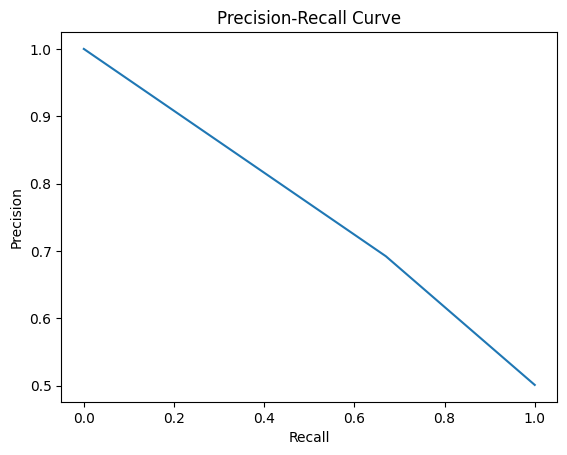

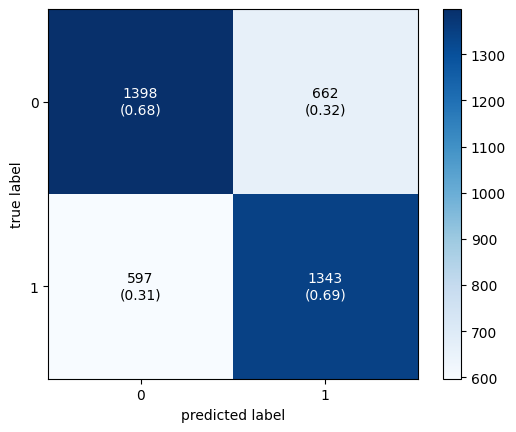

############################################################################




LogisticRegression

Train score of trained model: 68.33333333333333
Test score of trained model: 68.075
 
Accuracy : 0.68075
Precision: 0.6753117206982544
Recall   : 0.6838383838383838
F1 score : 0.6795483061480553
Specificity : 0.6777227722772278

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2020
           1       0.68      0.68      0.68      1980

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000





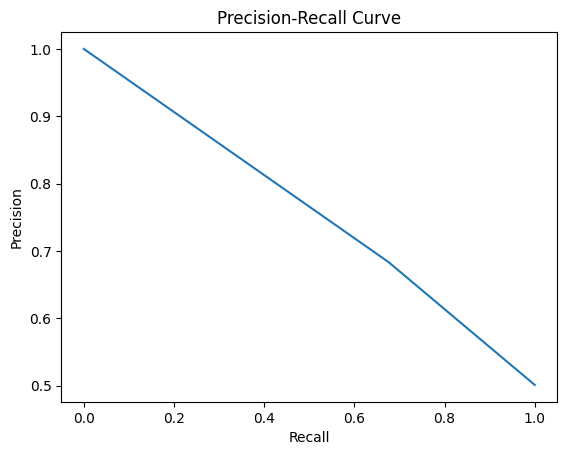

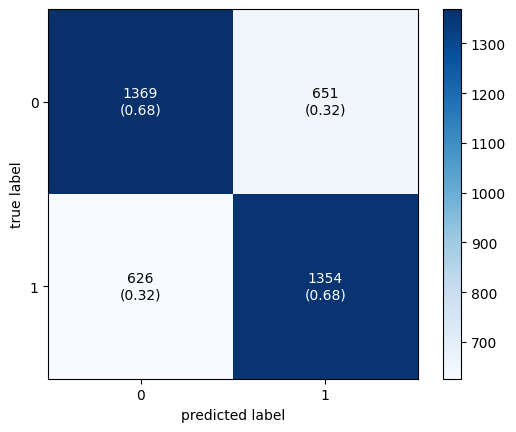

############################################################################




RandomForestClassifier

Train score of trained model: 100.0
Test score of trained model: 79.325
 
Accuracy : 0.79325
Precision: 0.8189526184538654
Recall   : 0.7796771130104464
F1 score : 0.7988324008756994
Specificity : 0.8083421330517423

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1894
           1       0.82      0.78      0.80      2106

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000





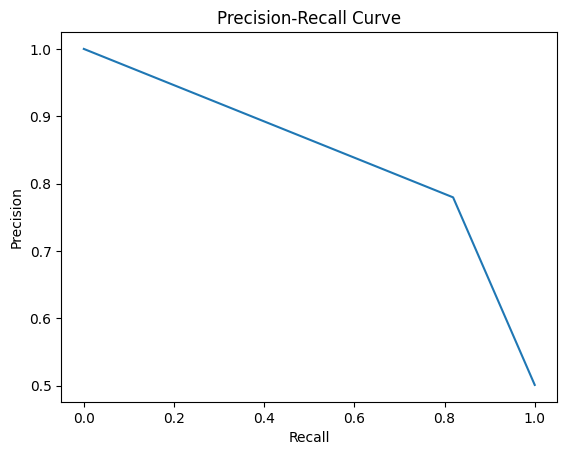

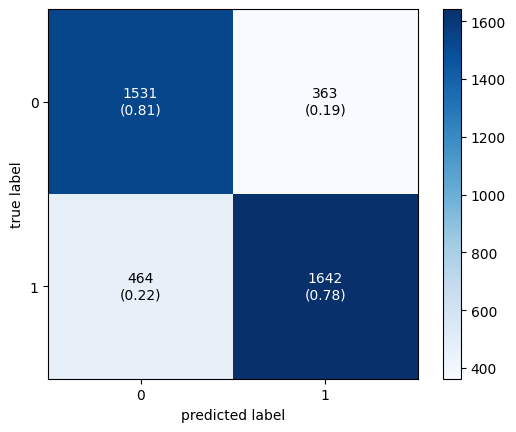

############################################################################




SupportVectorMachine

Train score of trained model: 90.01666666666667
Test score of trained model: 85.7
 
Accuracy : 0.857
Precision: 0.886783042394015
Recall   : 0.8374941121055111
F1 score : 0.8614341085271318
Specificity : 0.8790623335109217

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1877
           1       0.89      0.84      0.86      2123

    accuracy                           0.86      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.86      0.86      0.86      4000





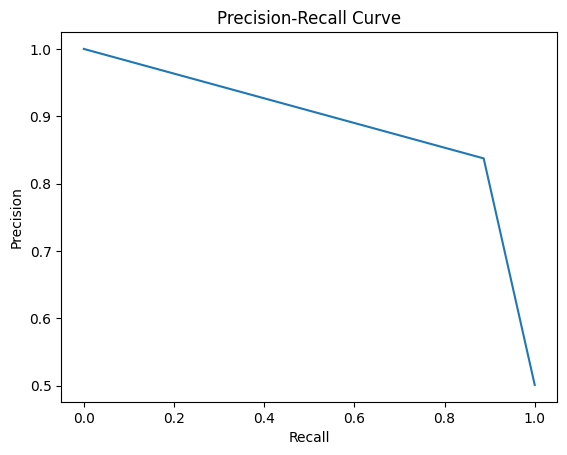

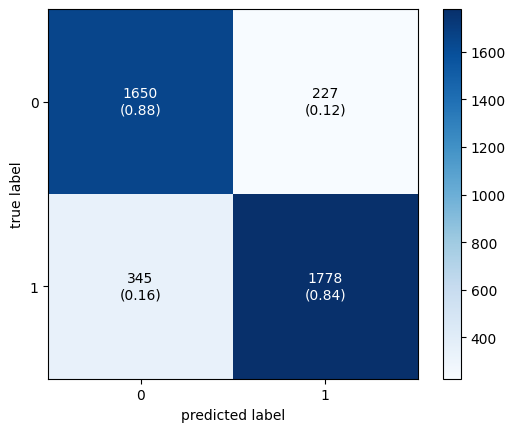

############################################################################




DecisionTreeClassifier

Train score of trained model: 100.0
Test score of trained model: 67.375
 
Accuracy : 0.67375
Precision: 0.6653366583541147
Recall   : 0.6778455284552846
F1 score : 0.6715328467153285
Specificity : 0.6697834645669292

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2032
           1       0.67      0.68      0.67      1968

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000





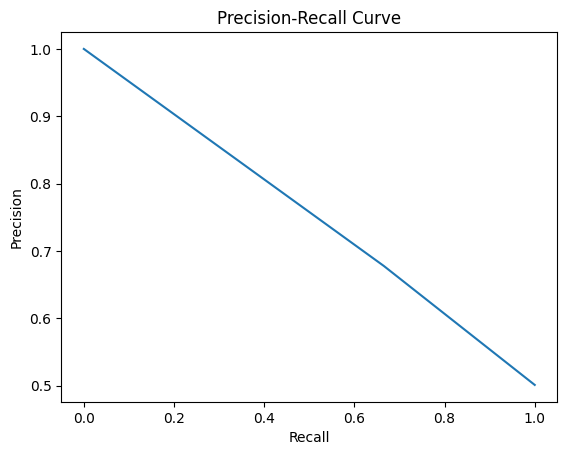

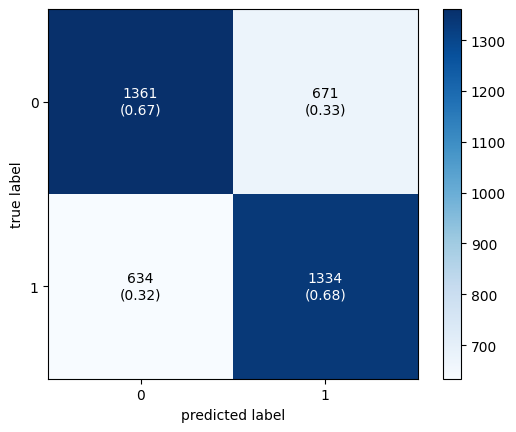

############################################################################




KNeighborsClassifier

Train score of trained model: 84.63333333333334
Test score of trained model: 75.64999999999999
 
Accuracy : 0.7565
Precision: 0.8054862842892768
Recall   : 0.734424738517508
F1 score : 0.7683158896289248
Specificity : 0.7834536368684064

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1801
           1       0.81      0.73      0.77      2199

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000





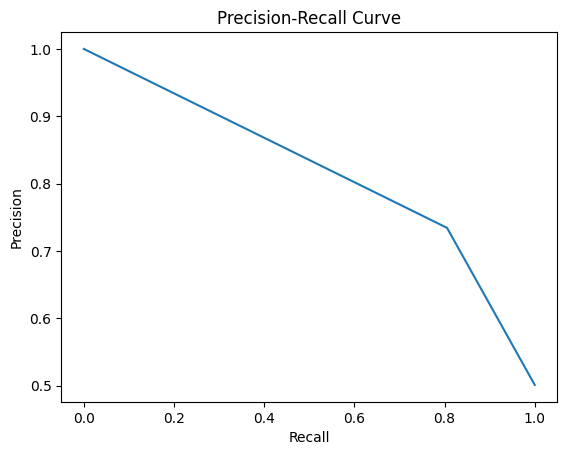

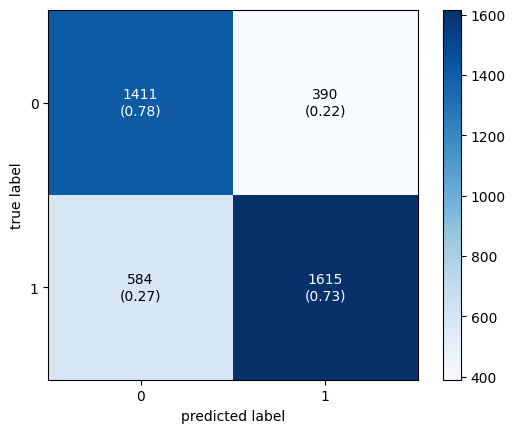

############################################################################




GradientBoostingClassifier

Train score of trained model: 88.75
Test score of trained model: 80.5
 
Accuracy : 0.805
Precision: 0.8309226932668329
Recall   : 0.7906976744186046
F1 score : 0.8103112840466925
Specificity : 0.820919175911252

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1893
           1       0.83      0.79      0.81      2107

    accuracy                           0.81      4000
   macro avg       0.80      0.81      0.80      4000
weighted avg       0.81      0.81      0.81      4000





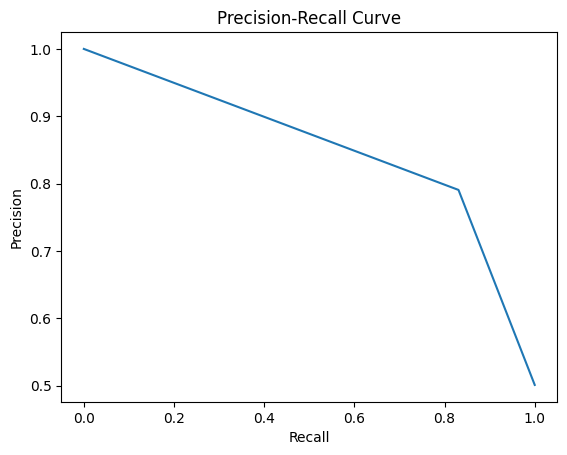

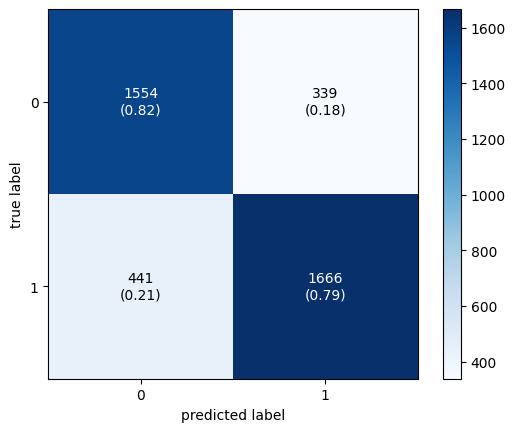

############################################################################




AdaBoostClassifier

Train score of trained model: 81.91666666666667
Test score of trained model: 77.17500000000001
 
Accuracy : 0.77175
Precision: 0.7725685785536159
Recall   : 0.7721834496510469
F1 score : 0.7723759660932435
Specificity : 0.7713139418254764

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1994
           1       0.77      0.77      0.77      2006

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000





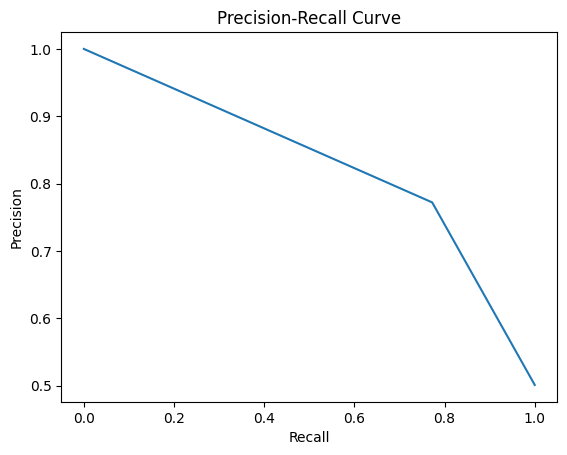

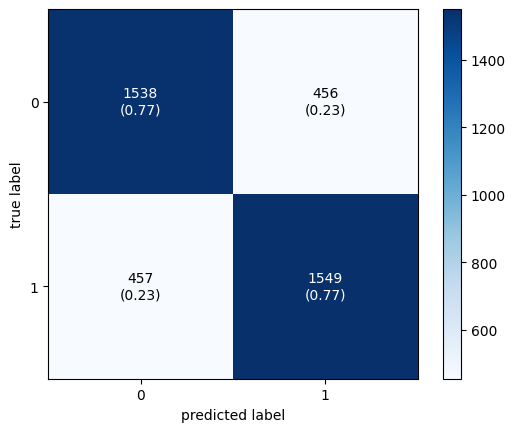

############################################################################




XGBClassifier

Train score of trained model: 92.38333333333333
Test score of trained model: 76.825
 
Accuracy : 0.76825
Precision: 0.771571072319202
Recall   : 0.7673611111111112
F1 score : 0.7694603332504352
Specificity : 0.7691532258064516

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1984
           1       0.77      0.77      0.77      2016

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000





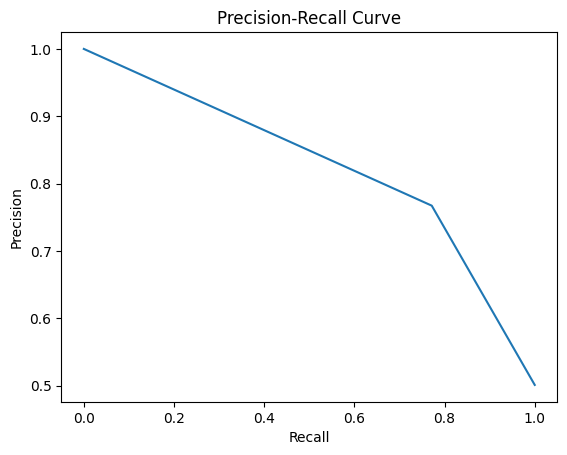

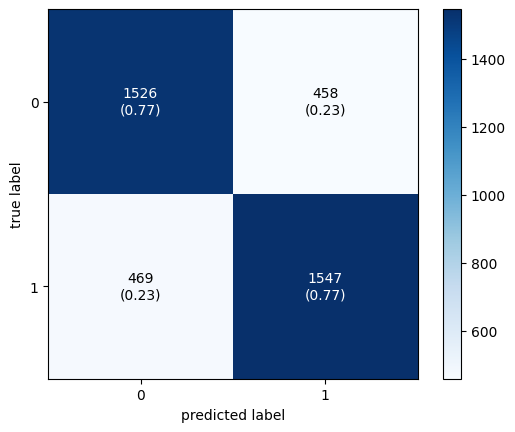

############################################################################




Neural Nets

Train score of trained model: 82.15
Test score of trained model: 80.625
 
Accuracy : 0.80625
Precision: 0.827431421446384
Recall   : 0.7945402298850575
F1 score : 0.8106523332518935
Specificity : 0.8190376569037657

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1912
           1       0.83      0.79      0.81      2088

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000





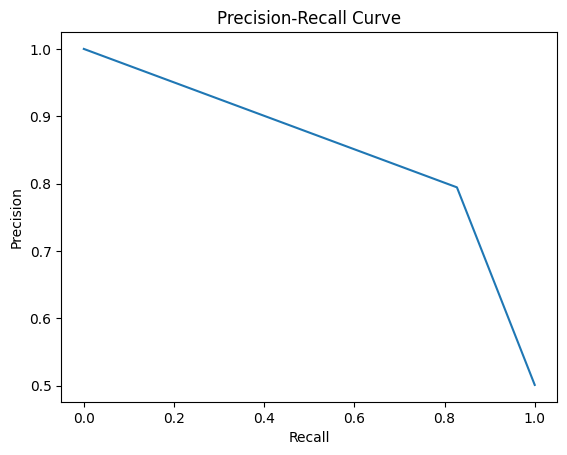

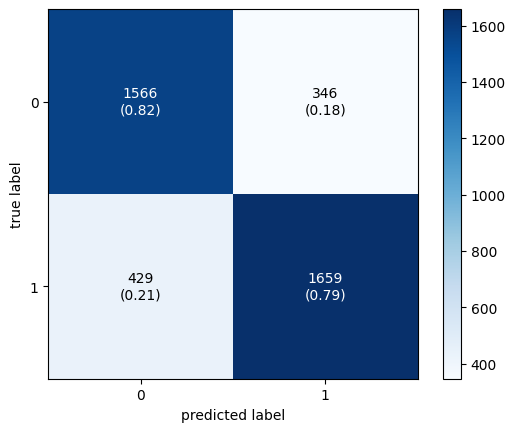

############################################################################





In [28]:
models = {
    'GaussianNB':GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 10),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB",'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier','XGBClassifier', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
#     score = model.score(X_valid, y_valid)

    print(f'\n{m}\n') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

#     validation_score = model.score(X_valid, y_valid)
#     print(f'Validation score of trained model: {validation_score*100}')
#     validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")

    y_predictions = model.predict(X_test)
    cm = confusion_matrix(y_predictions, y_test)

    tn = cm[0,0]
    fp = cm[0,1]
    tp = cm[1,1]
    fn = cm[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_predictions)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    
    # Plot non-normalized confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
    plt.show()

    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

In [29]:
modelNames

[]

In [30]:
modelNames = ["GaussianNB", 'LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'XGBClassifier', 'Neural Nets']

for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')
     
import pandas as pd
data = {'Model': modelNames, 'Accuracy': testScores}  
result = pd.DataFrame(data)
result

Accuracy of GaussianNB -----> 68.525
Accuracy of LogisticRegression -----> 68.075
Accuracy of RandomForestClassifier -----> 79.325
Accuracy of SupportVectorMachine -----> 85.7
Accuracy of DecisionTreeClassifier -----> 67.375
Accuracy of KNeighborsClassifier -----> 75.64999999999999
Accuracy of GradientBoostingClassifier -----> 80.5
Accuracy of AdaBoostClassifier -----> 77.17500000000001
Accuracy of XGBClassifier -----> 76.825
Accuracy of Neural Nets -----> 80.625


,Model,Accuracy
0,GaussianNB,68.525
1,LogisticRegression,68.075
2,RandomForestClassifier,79.325
3,SupportVectorMachine,85.700
4,DecisionTreeClassifier,67.375
5,KNeighborsClassifier,75.650
6,GradientBoostingClassifier,80.500
7,AdaBoostClassifier,77.175
8,XGBClassifier,76.825
9,Neural Nets,80.625


In [31]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 3), ha = 'center',
                 bbox = dict(facecolor = 'gold', alpha =.9), weight='bold')

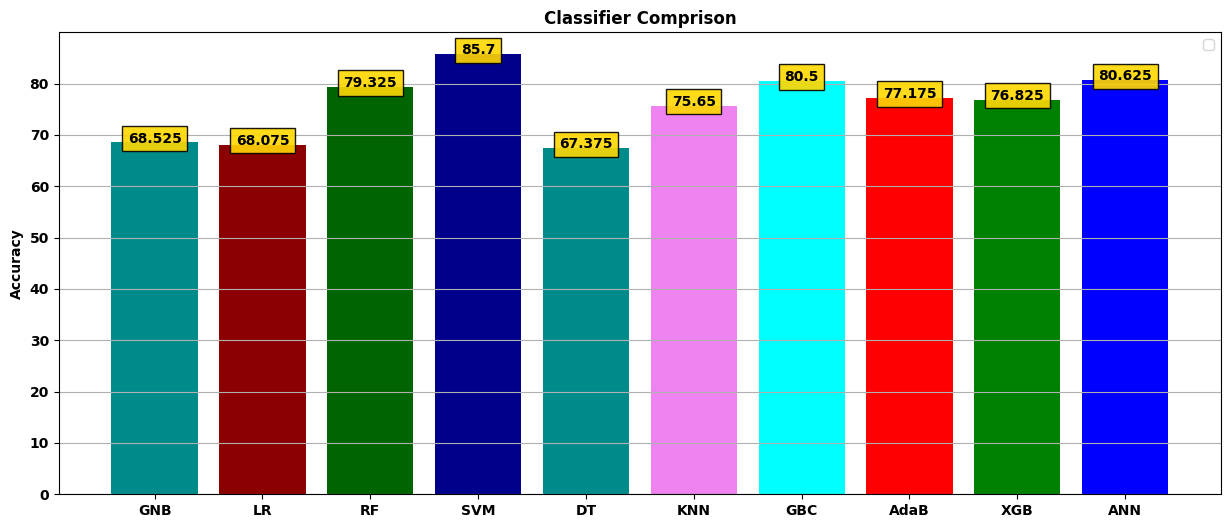

In [32]:
Names = ["GNB",'LR','RF','SVM',
             'DT', 'KNN','GBC', 'AdaB','XGB',
              'ANN']
fig = plt.figure(figsize=(15,6))
plt.title("Classifier Comprison",fontweight='bold')
plt.ylabel("Accuracy", fontweight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.bar(Names, testScores, color=['darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkcyan', 'violet', 'cyan', 'red', 'green', 'blue', 'purple'])

plt.grid(axis='y')
addlabels(Names, testScores)
plt.legend()

### Select Best Model and Save

In [33]:
best_model = result.Model.iloc[np.argmax(result.Accuracy)]
print(f'Best model is: {best_model}')
model = models[best_model]
model.fit(X_train, y_train)

Best model is: SupportVectorMachine


SVC()

In [34]:
import pickle

filename = "/content/drive/MyDrive/Model_Image/daisy_model.pickle"

# save model
# pickle.dump(model, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))


Female


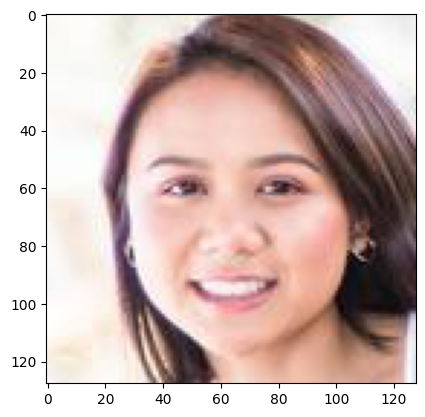

In [35]:
test_Model_Image = '/content/drive/MyDrive/Model_Image/4.jpg'
from PIL import Image

image = Image.open(test_Model_Image)
plt.imshow(image, cmap='gray')

# Resize image
image = image.resize((128, 128))
feature, daisy_img = daisy(image.convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)

feature = np.array(feature).flatten().reshape(1, -1)
y_pred = loaded_model.predict(feature)
if y_pred==1:
  print('Male')
else:
  print('Female')